In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")

# データの確認

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# データの基本統計量の確認

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data["Age"].mode()

0    24.0
dtype: float64

# 欠損値の処理

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, Cabin, Embarkedに欠損がある

### Age

- とりあえず、代表値を決めて埋める(候補は平均値か中央値)

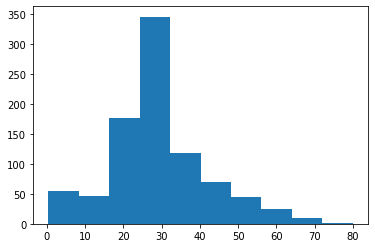

In [28]:
plt.hist(data["Age"].dropna())
plt.show()

- 若干左に寄っているので、中央値を採用

In [8]:
data["Age"] = data["Age"].fillna(data["Age"].median())

### Cabin

In [9]:
data[["Survived", "Cabin"]].dropna()

,Survived,Cabin
1,1,C85
3,1,C123
6,0,E46
10,1,G6
11,1,C103
21,1,D56
23,1,A6
27,0,C23 C25 C27
31,1,B78
52,1,D33


In [10]:
data[["Survived", "Cabin"]].dropna()["Survived"].mean()

0.6666666666666666

- 全体の生存率38%に比べて、Cabinの情報が残っている人は生存率高めかも？
- 情報が残っていない人をラベル0、情報が残っている人をラベル1としてみよう。

In [11]:
data["Cabin"] = data["Cabin"].isnull()^1
data["Cabin"] = data["Cabin"].astype(np.int64)

### Embarked

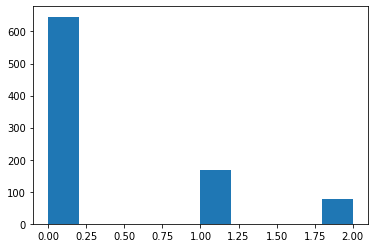

In [29]:
plt.hist(data["Embarked"].dropna())
plt.show()

- Sが多いのでとりあえずSで埋める

In [13]:
data["Embarked"] = data["Embarked"].fillna("S")

# 文字列を数値に変換

- Cabinについては先に変換を行った
- Name, Ticketは使わないこととする
- SexとEmbarkedを数値に変換する

### Sex

- male -> 0, female -> 1

In [14]:
data["Sex"] = data["Sex"].replace("male", 0)
data["Sex"] = data["Sex"].replace("female", 1)

### Embarked

- S -> 0, C -> 1, Q -> 2

In [15]:
data["Embarked"] = data["Embarked"].replace("S", 0)
data["Embarked"] = data["Embarked"].replace("C", 1)
data["Embarked"] = data["Embarked"].replace("Q", 2)

# 前処理が終わったデータの確認

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0


In [17]:
data.shape

(891, 12)

### 変数間の相関

<Figure size 144x144 with 0 Axes>

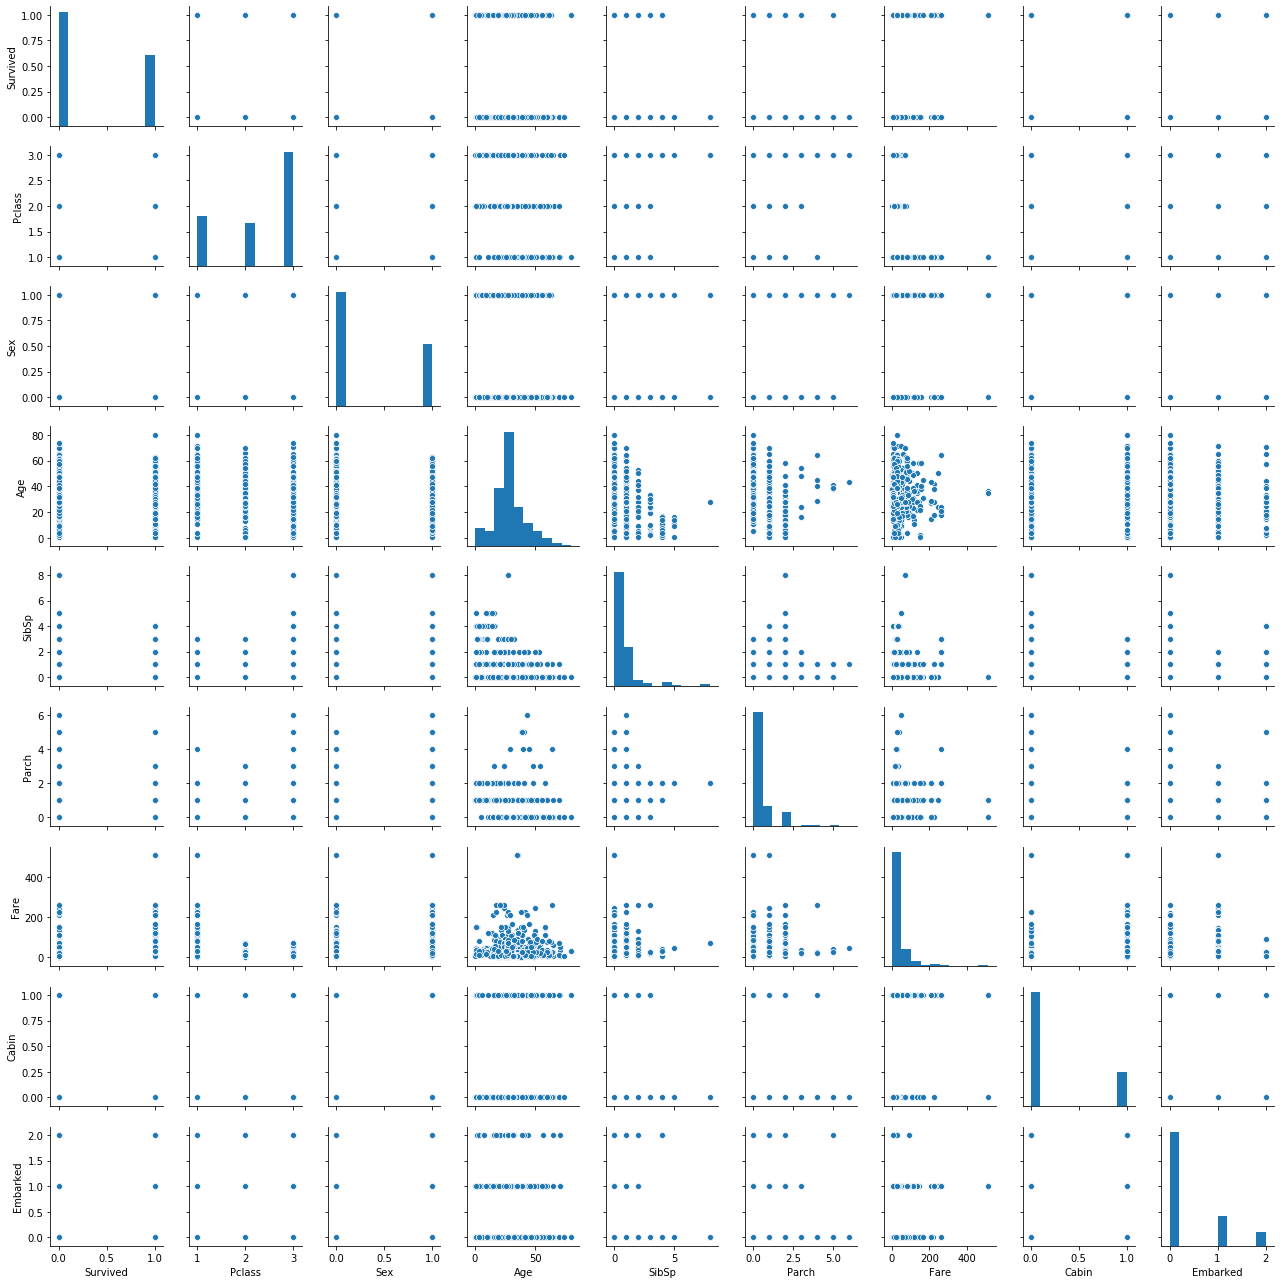

In [18]:
import seaborn as sns
plt.figure(figsize=(2, 2))
sns.pairplot(data.drop(["PassengerId", "Name"], axis=1), height=2.0)
plt.show()

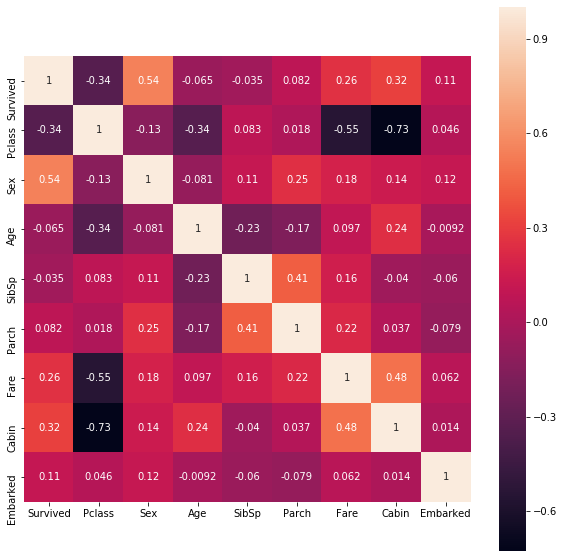

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.drop(["PassengerId", "Name"], axis=1).corr(), square=True, annot=True)

- CabinとPclassに負の相関あり？

# 学習

- Kaggleは提出回数が限られているので、トレーニングデータを分割して、良いモデルを評価する。

In [20]:
X = data.drop(["PassengerId", "Survived", "Name", "Ticket"], axis=1)
y = data["Survived"]

### 4-fold cross validation

In [21]:
from sklearn.model_selection import cross_val_score

# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.63392857 0.71300448 0.67117117 0.71621622]
Average score: 0.6835801107802228


# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
scores = cross_val_score(lr, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.79910714 0.8161435  0.77477477 0.80630631]
Average score: 0.7990829304240179


# SVM

### グリッドサーチ

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
def param():
  ret = {
      'C':[0.001, 0.01, 0.1, 1, 10, 100],
      'gamma':[0.001, 0.01, 0.1, 1, 10, 100]
  }
  return ret
gscv = GridSearchCV(SVC(), param(), cv=4)
gscv.fit(X, y)

print('Best score: {}'.format(gscv.best_score_))
print('Best parameters: {}'.format(gscv.best_params_))

Best score: 0.7878787878787878
Best parameters: {'C': 100, 'gamma': 0.001}


- C=100, gamma=0.001

In [33]:
svm = SVC(C=gscv.best_params_["C"], gamma=gscv.best_params_["gamma"])
scores = cross_val_score(svm, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.76339286 0.80269058 0.77027027 0.81531532]
Average score: 0.7879172564220209


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.71875    0.80717489 0.77477477 0.77477477]
Average score: 0.7688686093604816


# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
scores = cross_val_score(rf, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.77678571 0.8206278  0.76576577 0.81531532]
Average score: 0.7946236495143446


# アンサンブル学習(Voting)

- Logistic Regression、SVM、Decision Tree, Random Forestを採用。

### 最適な重みを探索

In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
max_score = 0
for w_lr in range(5):
    for w_svm in range(5):
        for w_dt in range(5):
            for w_rf in range(1, 6):
                vote_clf = VotingClassifier([('lr', lr), ('svm', svm), ('dt', dt), ('rf', rf)], weights=[w_lr, w_svm, w_dt, w_rf])
                vote_clf.fit(X_train, y_train)
                tmp_score = vote_clf.score(X_test, y_test)
                if max_score < tmp_score:
                    max_score = tmp_score
                    print(w_lr, w_svm, w_dt, w_rf)
print("Test set score: {:.3f}".format(max_score))
print()

0 0 0 1
0 0 0 2
0 0 0 4
3 0 1 3
3 1 2 3
4 0 1 4
Test set score: 0.870



In [66]:
vote_clf =  VotingClassifier([('lr', lr), ('svm', svm), ('dt', dt), ('rf', rf)], weights=[4, 1, 1, 4])
scores = cross_val_score(vote_clf, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.78571429 0.86547085 0.80630631 0.83333333]
Average score: 0.8227061943429657


# Votingをとりあえず採用

In [73]:
vote_clf.fit(X, y)
print()

# 提出用ファイルを作成

In [70]:
test = pd.read_csv("test.csv")

In [74]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Age、Cabin、Sex、Embarkedはトレーニングデータと同じように補完を行う。

In [83]:
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Cabin"] = test["Cabin"].isnull()^1
test["Cabin"] = test["Cabin"].astype(np.int64)
test["Sex"] = test["Sex"].replace("male", 0)
test["Sex"] = test["Sex"].replace("female", 1)
test["Embarked"] = test["Embarked"].replace("S", 0)
test["Embarked"] = test["Embarked"].replace("C", 1)
test["Embarked"] = test["Embarked"].replace("Q", 2)

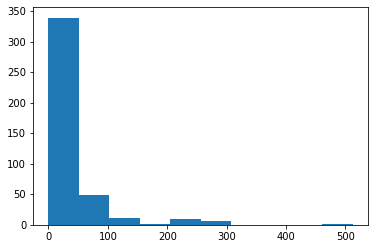

In [84]:
plt.hist(test["Fare"].dropna())
plt.show()

- Fareは中央値で埋めることにする。

In [85]:
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

### テストデータの表示

In [94]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,1,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,1,0


In [95]:
X_test = test.drop(["PassengerId", "Name", "Ticket"], axis=1)

### 予測結果

In [110]:
pred = vote_clf.predict(X_test)

In [111]:
submit = pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":pred})

In [112]:
submit.to_csv("gender_submission.csv",index=False)

# 結果

- 76%くらい